<a href="https://colab.research.google.com/github/cepdnaclk/e18-4yp-Predicting-Forex-Currency-Exchange-Rate-using-Machine-Learning/blob/main/models/GBPUSD/GPBUSD_IN2_LSTM_Bayesian_Version1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas_ta
!pip install bayesian-optimization

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218907 sha256=80c28dc2b40ef31ad0aa6effe4837373a99f7a9fc8a8845febe11f72607daff3
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas_ta


In [ ]:
import pandas as pd
import pandas_ta as ta

data = pd.read_csv('GBPUSD=X.csv')

data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-07-04,1.258384,1.259287,1.257055,1.258273,1.258273,0
1,2019-07-05,1.258336,1.258701,1.248299,1.258305,1.258305,0
2,2019-07-08,1.252615,1.254076,1.250125,1.252552,1.252552,0
3,2019-07-09,1.251878,1.252035,1.244122,1.251643,1.251643,0
4,2019-07-10,1.245733,1.252113,1.244524,1.245858,1.245858,0
...,...,...,...,...,...,...,...
1301,2024-06-28,1.264382,1.266175,1.262021,1.264574,1.264574,0
1302,2024-07-01,1.265022,1.269535,1.263743,1.264862,1.264862,0
1303,2024-07-02,1.264622,1.268536,1.261639,1.264574,1.264574,0
1304,2024-07-03,1.268810,1.277710,1.267909,1.269036,1.269036,0


In [ ]:
data['T-4'] = data['Close']
data['T-3'] = data['Close'].shift(-1)
data['T-2'] = data['Close'].shift(-2)
data['T-1'] = data['Close'].shift(-3)
data['T0'] = data['Close'].shift(-4)

#data['SMA_5_H'] = ta.sma(data['High'], length=5).shift(-4)
#data['SMA_5_L'] = ta.sma(data['Low'], length=5).shift(-4)
data['EMA_5_C'] = ta.ema(data['Close'], length=5).shift(-4)
data['RSI'] = ta.rsi(data['Close'], length=14).shift(-14)

#Closing value of the next day
data['T_F'] = data['Close'].shift(-5)

print(data.head(10))


         Date      Open      High       Low     Close  Adj Close  Volume  \
0  2019-07-04  1.258384  1.259287  1.257055  1.258273   1.258273       0   
1  2019-07-05  1.258336  1.258701  1.248299  1.258305   1.258305       0   
2  2019-07-08  1.252615  1.254076  1.250125  1.252552   1.252552       0   
3  2019-07-09  1.251878  1.252035  1.244122  1.251643   1.251643       0   
4  2019-07-10  1.245733  1.252113  1.244524  1.245858   1.245858       0   
5  2019-07-11  1.250625  1.257229  1.250625  1.250813   1.250813       0   
6  2019-07-12  1.252270  1.256266  1.252270  1.252348   1.252348       0   
7  2019-07-15  1.257229  1.257640  1.251189  1.257197   1.257197       0   
8  2019-07-16  1.252035  1.252035  1.239741  1.251799   1.251799       0   
9  2019-07-17  1.240880  1.243936  1.238344  1.241203   1.241203       0   

        T-4       T-3       T-2       T-1        T0   EMA_5_C        RSI  \
0  1.258273  1.258305  1.252552  1.251643  1.245858  1.253326  38.986487   
1  1.258305

In [ ]:
#MACD calculation
# Calculate the 12-period EMA
data['EMA_12'] = data['Close'].ewm(span=12, adjust=False).mean()

# Calculate the 26-period EMA
data['EMA_26'] = data['Close'].ewm(span=26, adjust=False).mean()

# Calculate the MACD Line
data['MACD_Line'] = data['EMA_12'] - data['EMA_26']

# Calculate the Signal Line (9-period EMA of the MACD Line)
data['Signal_Line'] = data['MACD_Line'].ewm(span=9, adjust=False).mean()

# Calculate the MACD Histogram
data['MACD_Histogram'] = data['MACD_Line'] - data['Signal_Line']

In [ ]:
#ROC Calculations

# Calculate the 2 day ROC
data['ROC2'] = ((data['Close'] - data['Close'].shift(2)) / data['Close'].shift(2)) * 100

# Calculate the 4 day ROC
data['ROC4'] = ((data['Close'] - data['Close'].shift(4)) / data['Close'].shift(4)) * 100

# Calculate the 10 day ROC
data['ROC10'] = ((data['Close'] - data['Close'].shift(10)) / data['Close'].shift(10)) * 100

In [ ]:
print(data.tail(10))

            Date      Open      High       Low     Close  Adj Close  Volume  \
1296  2024-06-21  1.266047  1.266978  1.262563  1.266047   1.266047       0   
1297  2024-06-24  1.263967  1.269841  1.263360  1.263903   1.263903       0   
1298  2024-06-25  1.268311  1.270245  1.267154  1.268343   1.268343       0   
1299  2024-06-26  1.268472  1.269197  1.262084  1.268400   1.268400       0   
1300  2024-06-27  1.262148  1.266945  1.261352  1.262180   1.262180       0   
1301  2024-06-28  1.264382  1.266175  1.262021  1.264574   1.264574       0   
1302  2024-07-01  1.265022  1.269535  1.263743  1.264862   1.264862       0   
1303  2024-07-02  1.264622  1.268536  1.261639  1.264574   1.264574       0   
1304  2024-07-03  1.268810  1.277710  1.267909  1.269036   1.269036       0   
1305  2024-07-04  1.274486  1.276732  1.274177  1.276308   1.276308       0   

           T-4       T-3       T-2  ...  RSI       T_F    EMA_12    EMA_26  \
1296  1.266047  1.263903  1.268343  ...  NaN  1.2645

In [ ]:
# Dropping NaN values
data.dropna(inplace=True)

print(data.tail(10))


            Date      Open      High       Low     Close  Adj Close  Volume  \
1282  2024-06-03  1.274405  1.279394  1.269551  1.274372   1.274372       0   
1283  2024-06-04  1.281017  1.281723  1.274437  1.281017   1.281017       0   
1284  2024-06-05  1.277302  1.279525  1.275771  1.277302   1.277302       0   
1285  2024-06-06  1.279394  1.281066  1.276552  1.279476   1.279476       0   
1286  2024-06-07  1.279427  1.281082  1.271747  1.279329   1.279329       0   
1287  2024-06-10  1.272870  1.273237  1.268907  1.272945   1.272945       0   
1288  2024-06-11  1.272588  1.274941  1.270761  1.272637   1.272637       0   
1289  2024-06-12  1.273837  1.286008  1.273360  1.274048   1.274048       0   
1290  2024-06-13  1.279673  1.280607  1.275283  1.279623   1.279623       0   
1291  2024-06-14  1.275445  1.276487  1.265807  1.275510   1.275510       0   

           T-4       T-3       T-2  ...        RSI       T_F    EMA_12  \
1282  1.274372  1.281017  1.277302  ...  44.972287  1.27

In [ ]:
data = data[['Date', 'T-4','T-3','T-2','T-1','T0','EMA_5_C','RSI','MACD_Histogram','ROC2','ROC4','ROC10','T_F']]

data

,Date,T-4,T-3,T-2,T-1,T0,EMA_5_C,RSI,MACD_Histogram,ROC2,ROC4,ROC10,T_F
10,2019-07-18,1.243472,1.254186,1.251283,1.247489,1.243905,1.247486,28.752261,-0.001225,-0.665203,-0.708749,-1.176295,1.248595
11,2019-07-19,1.254186,1.251283,1.247489,1.243905,1.248595,1.247856,27.206476,-0.000583,1.046001,-0.239501,-0.327345,1.245345
12,2019-07-22,1.251283,1.247489,1.243905,1.248595,1.245345,1.247019,27.276519,-0.000318,0.628161,-0.041221,-0.101313,1.237670
13,2019-07-23,1.247489,1.243905,1.248595,1.245345,1.237670,1.243903,21.198342,-0.000360,-0.533972,0.506444,-0.331884,1.221747
14,2019-07-24,1.243905,1.248595,1.245345,1.237670,1.221747,1.236517,29.128644,-0.000576,-0.589635,0.034822,-0.156759,1.216160
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1287,2024-06-10,1.272945,1.272637,1.274048,1.279623,1.275510,1.276087,44.942364,-0.000051,-0.510443,-0.630124,-0.052214,1.268311
1288,2024-06-11,1.272637,1.274048,1.279623,1.275510,1.268311,1.273495,45.312032,-0.000464,-0.523087,-0.365223,-0.360152,1.271600
1289,2024-06-12,1.274048,1.279623,1.275510,1.268311,1.271600,1.272863,44.986748,-0.000654,0.086649,-0.424236,-0.140143,1.270745
1290,2024-06-13,1.279623,1.275510,1.268311,1.271600,1.270745,1.272157,50.871227,-0.000428,0.548939,0.022981,0.773666,1.272200


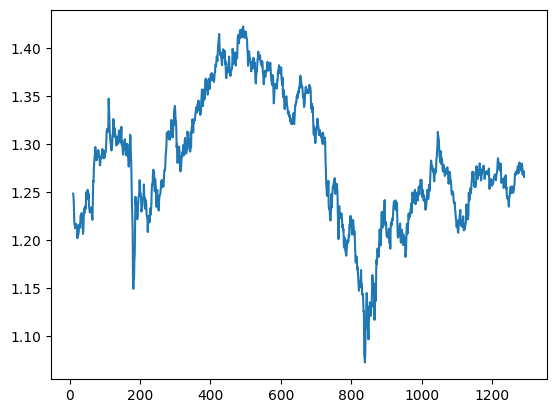

In [ ]:
import matplotlib.pyplot as plt

plt.plot(data.index, data['T_F'])

In [ ]:

dates=data['Date'].to_numpy()
middle_matrix =data[['T-4','T-3','T-2','T-1','T0','EMA_5_C','RSI','MACD_Histogram','ROC2','ROC4','ROC10',]].to_numpy()
X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))
Y=data['T_F']

print(dates.shape)
print(X.shape)
print(Y.shape)

(1282,)
(1282, 11, 1)
(1282,)


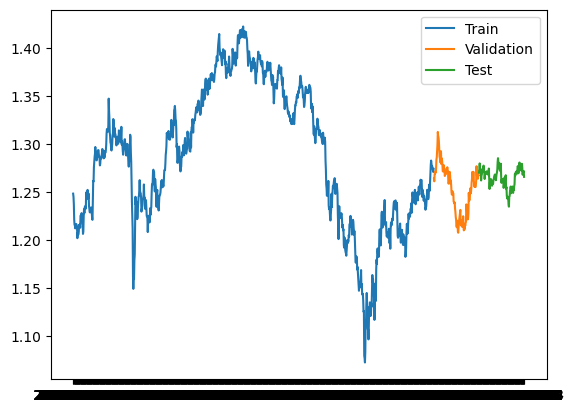

In [ ]:
q_80 = int(len(dates) * .8) #change to 0.8
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], Y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], Y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], Y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from bayes_opt import BayesianOptimization
import numpy as np
import time

def evaluate_network(lstm_units_1,epochs,learning_rate,dense_units_1,dense_units_2):

  lstm_units_1=int(lstm_units_1)
  epochs=int(epochs)
  dense_units_1=int(dense_units_1)
  dense_units_2=int(dense_units_2)

  model = Sequential([layers.Input((11, 1)),
                      layers.LSTM(lstm_units_1),
                      layers.Dense(dense_units_1, activation='relu'),
                      layers.Dense(dense_units_2, activation='relu'),
                      layers.Dense(1)])

  model.compile(loss='mse',
                optimizer=Adam(learning_rate=learning_rate),
                metrics=['mean_absolute_error'])


  # Train the model
  history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=epochs, verbose=0)

  # Return the loss (or another metric that you want to minimize)
  val_loss=min(history.history['val_loss'])
  loss=min(history.history['loss'])

  return -(val_loss*loss)  # Negative because BayesianOptimization maximizes, but we want to minimize loss



pbounds = {
    'lstm_units_1': (20, 300),
    'learning_rate': (1e-6, 1e-2),
    'epochs': (10, 150),
    'dense_units_1': (10, 200),
    'dense_units_2': (10, 200)
}

# Initialize Bayesian Optimization
optimizer = BayesianOptimization(
    f=evaluate_network,
    pbounds=pbounds,
    verbose=2,
    random_state=1,
    )

# Run the optimization
start_time = time.time()
optimizer.maximize(init_points=40, n_iter=50)
time_took = (time.time() - start_time)/60


# Get the best hyperparameters
print(f"Total runtime in mins: {time_took}")
best_params = optimizer.max['params']
print(f"Best hyperparameters: {best_params}")


|   iter    |  target   | dense_... | dense_... |  epochs   | learni... | lstm_u... |
-------------------------------------------------------------------------------------
| 1         | -3.476e-0 | 89.23     | 146.9     | 10.02     | 0.003024  | 61.09     |
| 2         | -1.068e-0 | 27.54     | 45.39     | 58.38     | 0.003968  | 170.9     |
| 3         | -1.866e-0 | 89.65     | 140.2     | 38.62     | 0.008781  | 27.67     |
| 4         | -1.136e-0 | 137.4     | 89.29     | 88.22     | 0.001405  | 75.47     |
| 5         | -1.854e-0 | 162.1     | 194.0     | 53.88     | 0.006924  | 265.4     |
| 6         | -2.714e-0 | 180.0     | 26.16     | 15.47     | 0.001699  | 265.9     |
| 7         | -1.002e-0 | 28.69     | 90.01     | 144.1     | 0.005332  | 213.7     |
| 8         | -1.138e-0 | 69.95     | 140.4     | 126.8     | 0.0001839 | 230.0     |
| 9         | -1.302e-0 | 197.9     | 152.2     | 49.26     | 0.007893  | 48.9      |
| 10        | -1.274e-0 | 95.1      | 182.6     | 51.1

Epoch 1/107
33/33 [==============================] - 3s 23ms/step - loss: 0.2095 - mean_absolute_error: 0.3246 - val_loss: 0.0022 - val_mean_absolute_error: 0.0373
Epoch 2/107
33/33 [==============================] - 0s 8ms/step - loss: 0.0073 - mean_absolute_error: 0.0681 - val_loss: 0.0069 - val_mean_absolute_error: 0.0737
Epoch 3/107
33/33 [==============================] - 0s 7ms/step - loss: 0.0046 - mean_absolute_error: 0.0552 - val_loss: 0.0046 - val_mean_absolute_error: 0.0593
Epoch 4/107
33/33 [==============================] - 0s 7ms/step - loss: 0.0041 - mean_absolute_error: 0.0525 - val_loss: 0.0012 - val_mean_absolute_error: 0.0263
Epoch 5/107
33/33 [==============================] - 0s 7ms/step - loss: 0.0041 - mean_absolute_error: 0.0534 - val_loss: 0.0046 - val_mean_absolute_error: 0.0612
Epoch 6/107
33/33 [==============================] - 0s 10ms/step - loss: 0.0039 - mean_absolute_error: 0.0521 - val_loss: 0.0016 - val_mean_absolute_error: 0.0323
Epoch 7/107
33/33 [=

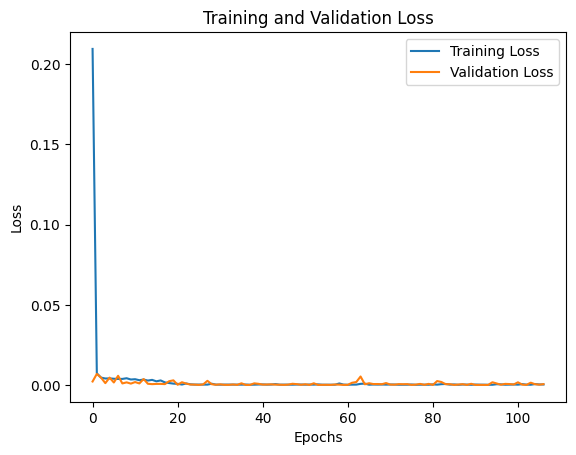

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

# model = Sequential([layers.Input((9, 1)),
#                     layers.LSTM(64),
#                     layers.Dense(1)])

model = Sequential([layers.Input((11, 1)),
                   layers.LSTM(33),
                   layers.Dense(29, activation='relu'),
                   layers.Dense(88, activation='relu'),
                   layers.Dense(1)])

model.compile(loss='mse',
              optimizer=Adam(learning_rate= 0.00414237),
              metrics=['mean_absolute_error'])


history=model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=107)

print(history.history.keys())

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')

# Add labels and legend
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

33/33 [==============================] - 1s 4ms/step


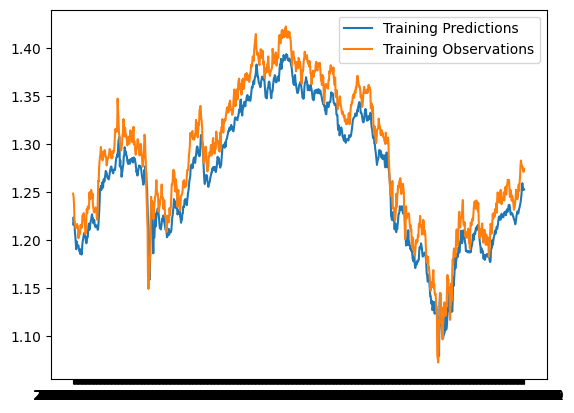

In [ ]:
from sklearn.metrics import mean_squared_error

train_predictions = model.predict(X_train).flatten()
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

223.62216977896279


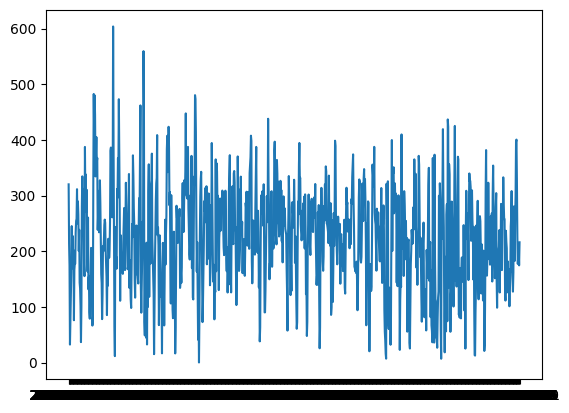

In [ ]:
import numpy as np

basis_point_value=0.0001  #For EURUSD pair
train_data_basis_point_diff=((train_predictions/basis_point_value).flatten()-y_train/basis_point_value).abs()
plt.plot(dates_train, train_data_basis_point_diff)

average_train_data_basis_point_diff=np.mean(train_data_basis_point_diff)
print(average_train_data_basis_point_diff)

4/4 [==============================] - 0s 6ms/step


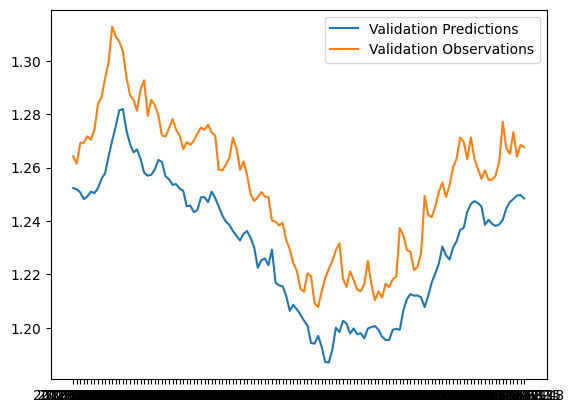

In [ ]:
val_predictions = model.predict(X_val).flatten()
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

222.12957122802675


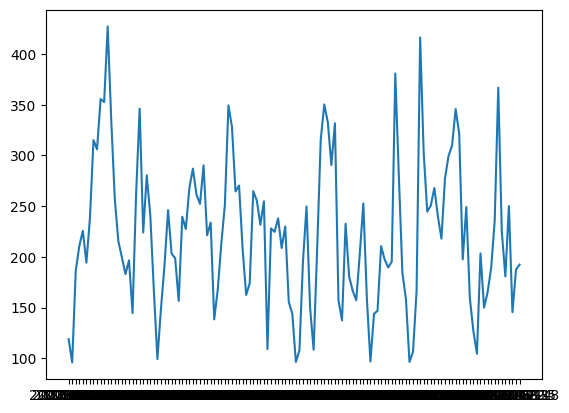

In [ ]:
basis_point_value=0.0001  #For EURUSD pair
validation_data_basis_point_diff=((val_predictions/basis_point_value).flatten()-y_val/basis_point_value).abs()
plt.plot(dates_val, validation_data_basis_point_diff)

print(np.mean(validation_data_basis_point_diff))

5/5 [==============================] - 0s 4ms/step


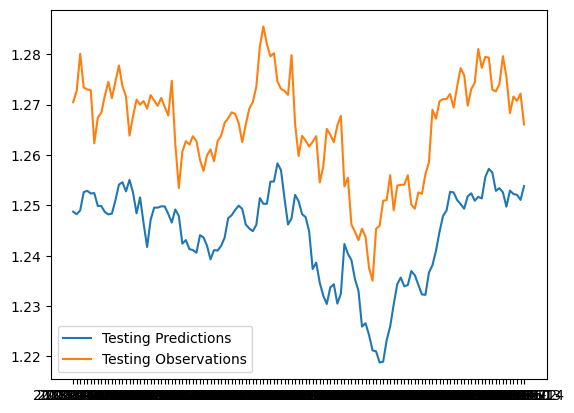

In [ ]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Assuming test_predictions and y_test are lists or numpy arrays
# Calculate MSE and MAE
mse = mean_squared_error(y_test, test_predictions)
print("Mean Square Error:", mse)
mae=mean_absolute_error(y_test, test_predictions)
print("Mean Absolute Error:", mae)

Mean Square Error: 0.000484297244901399
Mean Absolute Error: 0.02117391080356568


211.7387790697668


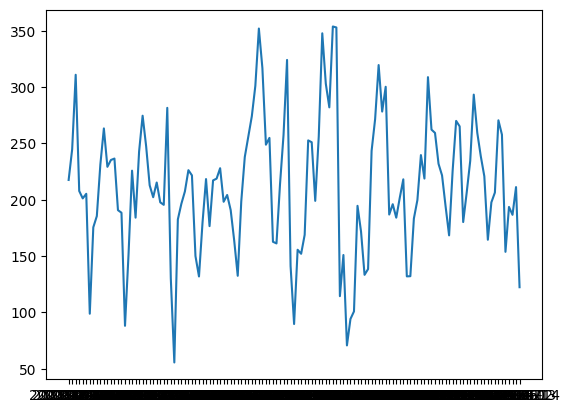

In [ ]:
basis_point_value=0.0001  #For EURUSD pair
test_data_basis_point_diff=((test_predictions/basis_point_value).flatten()-y_test/basis_point_value).abs()
plt.plot(dates_test, test_data_basis_point_diff)

print(np.mean(test_data_basis_point_diff))

In [ ]:
#Start Trading with 1000 USD with model


number_of_trading_days=dates_test.size
test_data=y_test.values
holding_currency="quote"
holding_value=1000
for current_trading_day in range(number_of_trading_days-1):
  if holding_currency=="quote":
    if (test_predictions[current_trading_day+1]>test_data[current_trading_day]):
      holding_value=holding_value/test_data[current_trading_day]
      holding_currency="base"
  else:
    if (test_predictions[current_trading_day+1]<test_data[current_trading_day]):
      holding_value=test_data[current_trading_day]*holding_value
      holding_currency="quote"


if holding_currency=="base":
  holding_value=test_data[current_trading_day]*holding_value

print(number_of_trading_days)
print(holding_value)
print(holding_currency)


129
1000
quote


In [ ]:
#Start Trading with 1000 USD with actual values


number_of_trading_days=dates_test.size
test_data=y_test.values
holding_currency="quote"
holding_value=1000
for current_trading_day in range(number_of_trading_days-1):
  if holding_currency=="quote":
    if (test_data[current_trading_day+1]>test_data[current_trading_day]):
      holding_value=holding_value/test_data[current_trading_day]
      holding_currency="base"
  else:
    if (test_data[current_trading_day+1]<test_data[current_trading_day]):
      holding_value=test_data[current_trading_day]*holding_value
      holding_currency="quote"


if holding_currency=="base":
  holding_value=test_data[current_trading_day]*holding_value

print(number_of_trading_days)
print(holding_value)
print(holding_currency)

129
1185.5255377520195
quote


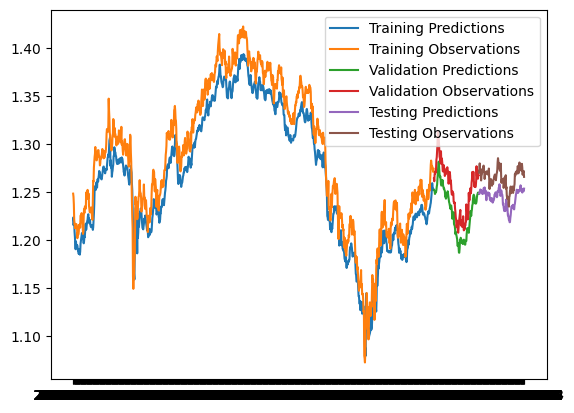

In [ ]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations'])

In [ ]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

1/1 [==============================] - 0s 39ms/step


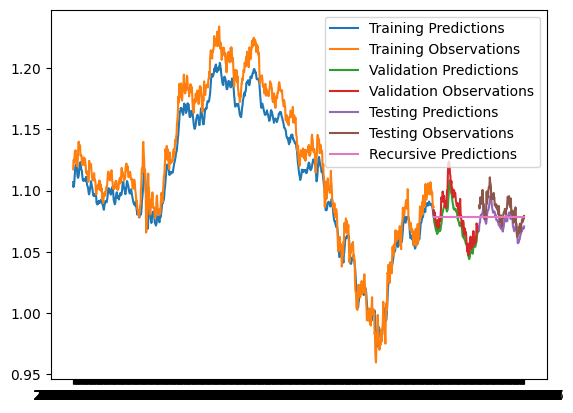

In [ ]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations',
            'Recursive Predictions'])